In [8]:
## Principal componant Analysis

####
## This data sets consists of 3 different types of irises’ 
## (Setosa, Versicolour, and Virginica) petal and sepal length,
## stored in a 150x4 numpy.ndarray
####

%matplotlib inline

print(__doc__)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names


Automatically created module for IPython interactive environment


array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [14]:
## Fit model and apply dimensionality reduction using PCA

# import numpy as np
# from sklearn.decomposition import IncrementalPCA
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
# ipca = IncrementalPCA(n_components=2, batch_size=3)
# p1= ipca.fit(X)

# p2 = ipca.transform(X) 

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

IncrementalPCA(batch_size=3, copy=True, n_components=2, whiten=False)

In [16]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [ 0.99244289  0.00755711]


In [18]:
## plot LCA for Iris


plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()

/Users/adeshpan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 6 but corresponding boolean dimension is 150


IndexError: index 6 is out of bounds for axis 0 with size 6

In [25]:

###
## http://sebastianraschka.com/Articles/2014_pca_step_by_step.html
###

# Listed below are the 6 general steps for performing a principal component analysis, which we will investigate in the following sections.

# 1. Take the whole dataset consisting of dd-dimensional samples ignoring the class labels
# 2. Compute the dd-dimensional mean vector (i.e., the means for every dimension of the whole dataset)
# 3. Compute the scatter matrix (alternatively, the covariance matrix) of the whole data set
# 4. Compute eigenvectors (ee1,ee2,...,eedee1,ee2,...,eed) and corresponding eigenvalues
#(λλ1,λλ2,...,λλdλλ1,λλ2,...,λλd)
# 5. Sort the eigenvectors by decreasing eigenvalues and choose kk eigenvectors with the largest eigenvalues to form a d×kd×k dimensional matrix WWWW(where every column represents an eigenvector)
# 6. Use this d×kd×k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the mathematical equation: yy=WWT×xxyy=WWT×xx (where xxxx is a d×1d×1-dimensional vector representing one sample, and yyyy is the transformed k×1k×1-dimensional sample in the new subspace.)

import numpy as np

np.random.seed(4294967295) # random seed for consistency

# A reader pointed out that Python 2.7 would raise a
# "ValueError: object of too small depth for desired array".
# This can be avoided by choosing a smaller random seed, e.g. 1
# or by completely omitting this line, since I just used the random seed for
# consistency.

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

class2_sample.shape

(3, 20)

Populating the interactive namespace from numpy and matplotlib


/Users/adeshpan/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


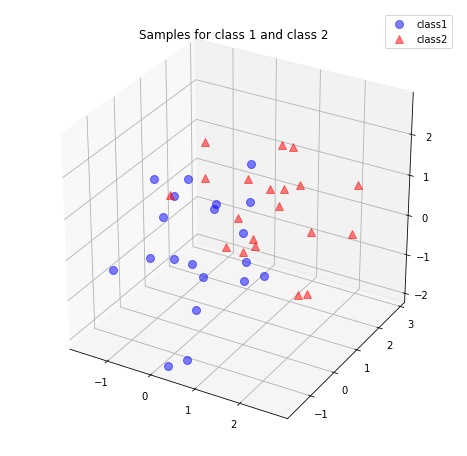

In [26]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [29]:
## 1. Taking the whole dataset ignoring the class labels
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"
all_samples


array([[ 0.64840867,  0.28450104, -0.04402602, -0.54592271,  0.64437451,
         1.43319167,  1.05232244, -0.94616254,  0.43132745, -1.33863303,
        -0.02745217,  0.24923551,  0.79774455, -1.12904254, -0.47391497,
         0.48477806, -1.15968948, -0.11300313,  0.19869207, -0.69495935,
         1.89606188,  0.92951657,  1.47505379,  2.5739956 ,  1.01184453,
        -1.56589176,  2.73157288,  1.62054307,  0.52845975,  1.93697448,
         0.11165479,  2.54325936,  0.43376282,  0.90091663,  0.99797269,
         0.21309449,  0.3830824 ,  0.69394044,  2.42643514,  0.73925553],
       [ 0.66932353,  0.11388774,  0.24877162, -0.02615814, -1.38537865,
         0.08608548,  0.03232405, -0.09364021,  1.35522792, -1.07992531,
        -0.92220214, -0.57915937,  0.66657167,  0.50776969,  0.41299248,
        -1.35110557,  0.03035856,  2.03634112, -1.61758761,  1.92902069,
         1.16287259,  1.81850406,  0.21599694,  1.82189419,  1.57078705,
         1.54489502, -1.00096159, -0.71672723, -0.

In [31]:
## Computing the d-dimensional mean vector

mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

('Mean Vector:\n', array([[ 0.55833188],
       [ 0.43288583],
       [ 0.30630128]]))


In [32]:
## 3. a) Computing the Scatter Matrix
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

('Scatter Matrix:\n', array([[ 45.53462832,   2.17367273,   8.90932866],
       [  2.17367273,  49.58879709,   9.06545317],
       [  8.90932866,   9.06545317,  47.62915361]]))


In [34]:
## 3. b) Computing the Covariance Matrix (alternatively to the scatter matrix)

cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

('Covariance Matrix:\n', array([[ 1.16755457,  0.0557352 ,  0.22844432],
       [ 0.0557352 ,  1.27150762,  0.23244752],
       [ 0.22844432,  0.23244752,  1.22126035]]))


In [35]:
## 4. Computing eigenvectors and corresponding eigenvalues

# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[-0.45180959]
 [-0.58843731]
 [-0.67052937]]
Eigenvalue 1 from scatter matrix: 61.5879322104
Eigenvalue 1 from covariance matrix: 1.57917774898
('Scaling factor: ', 39.000000000000014)
----------------------------------------
Eigenvector 2: 
[[-0.68317733]
 [ 0.71157059]
 [-0.16412199]]
Eigenvalue 2 from scatter matrix: 45.4109344928
Eigenvalue 2 from covariance matrix: 1.16438293571
('Scaling factor: ', 38.999999999999957)
----------------------------------------
Eigenvector 3: 
[[-0.57370448]
 [-0.38393857]
 [ 0.72350144]]
Eigenvalue 3 from scatter matrix: 35.7537123231
Eigenvalue 3 from covariance matrix: 0.916761854439
('Scaling factor: ', 38.999999999999979)
----------------------------------------


In [36]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

Populating the interactive namespace from numpy and matplotlib


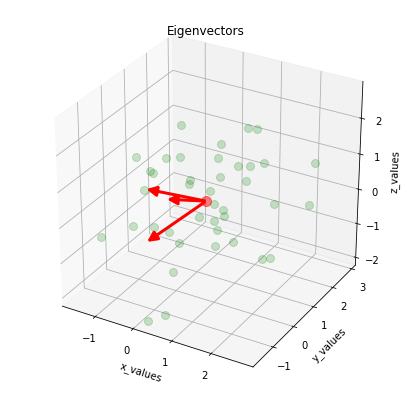

In [37]:
## Viz the Eigenvectors

%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [38]:
## 5.1. Sorting the eigenvectors by decreasing eigenvalues

## Roughly speaking, the eigenvectors with the lowest eigenvalues
## bear the least information about the distribution of the data,
## and those are the ones we want to drop

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

61.5879322104
45.4109344928
35.7537123231


In [40]:
## 5.2. Choosing k eigenvectors with the largest eigenvalues

## For our simple example, where we are reducing a 3-dimensional feature space to a 2-dimensional feature subspace, 
## we are combining the two eigenvectors with the highest eigenvalues to construct 
## our d×kd×k-dimensional eigenvector matrix  W

matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

('Matrix W:\n', array([[-0.45180959, -0.68317733],
       [-0.58843731,  0.71157059],
       [-0.67052937, -0.16412199]]))


In [41]:
## 6. Transforming the samples onto the new subspace

transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."
transformed

array([[ 0.03772411, -0.77732205,  0.53614221, -0.41141834,  0.24241508,
        -0.42909825, -0.396316  , -0.41393884, -1.93750114,  1.58953294,
         0.48637723,  1.08554647, -1.37505206,  0.17428668, -0.85183721,
         1.92638612,  1.00332654, -0.60199437,  2.28786879, -0.67795701,
        -1.71897234, -1.97008139, -1.905206  , -3.10254899, -2.67369403,
        -0.16800155, -0.74266043, -0.9671065 , -1.81195883, -1.80969675,
        -1.15788819, -0.80610903, -0.29910449, -0.70694542, -1.74998301,
        -0.33860472, -0.91256777, -2.73750493, -2.22810575, -2.18522558],
       [ 0.21063383, -0.25572133,  0.36928645,  0.1895084 , -1.49495693,
        -0.85200504, -0.67189733,  0.36032728,  0.43832613,  0.23156655,
        -0.65426867, -0.37253462, -0.22302682,  1.1235854 ,  0.41621541,
        -0.96207268,  0.93558067,  1.65964957, -0.93778627,  1.88245575,
        -0.51145745,  0.54147216, -1.12612195, -0.67442811,  0.11016585,
         2.17730463, -2.60227119, -1.77785213, -1.

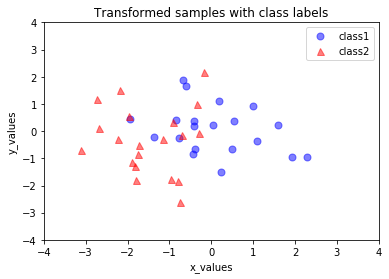

In [42]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

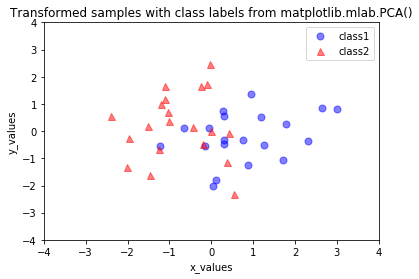

In [44]:
## Confirm results using scikit-learn

from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

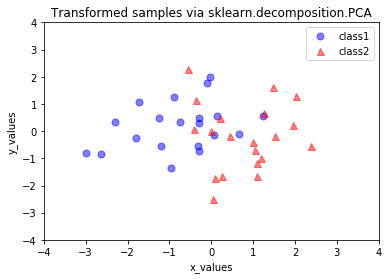

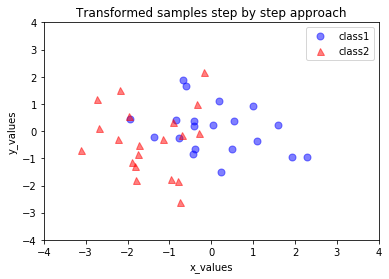

In [45]:
sklearn_transf = sklearn_transf * (-1)

# sklearn.decomposition.PCA
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()

# step by step PCA
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples step by step approach')
plt.show()